In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import  OneHotEncoder, StandardScaler

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency,Label of activity
0,234.50,0.97555,-0.082679,0.134560,3,-48.5,4.2798,921.75,3
1,305.75,1.08110,-0.140090,-0.082102,4,-66.5,3.8948,920.75,3
2,444.33,0.10787,0.238850,-1.074200,3,-60.0,5.5576,923.75,3
3,101.75,1.13970,-0.025263,-0.093505,3,-56.5,4.0221,922.25,3
4,1560.30,0.26030,0.169950,-1.062800,3,-62.5,5.8644,920.25,3


In [4]:
data.shape

(45076, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45076 entries, 0 to 45075
Data columns (total 9 columns):
Time(secs)                                   45076 non-null float64
Acceleration reading in G(frontal axis)      45076 non-null float64
Acceleration reading in G (vertical axis)    45076 non-null float64
Acceleration reading in G(lateral axis)      45076 non-null float64
Id of antenna reading sensor                 45076 non-null int64
Received signal strength indicator (RSSI)    45076 non-null float64
Phase                                        45076 non-null float64
Frequency                                    45076 non-null float64
Label of activity                            45076 non-null int64
dtypes: float64(7), int64(2)
memory usage: 3.1 MB


In [6]:
data.describe()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency,Label of activity
count,45076.000000,45076.000000,45076.000000,45076.000000,45076.000000,45076.000000,45076.000000,45076.000000,45076.000000
mean,299.614538,0.717398,0.341945,-0.216550,2.413790,-58.291885,3.157296,922.677034,2.535008
std,257.880992,0.404911,0.418692,0.437125,1.103215,5.186853,2.183353,1.680887,0.861524
min,0.000000,-0.748080,-0.553490,-1.336400,1.000000,-72.000000,0.001534,920.250000,1.000000
25%,121.950000,0.342380,-0.013780,-0.184730,1.000000,-62.000000,1.027800,921.250000,2.000000
50%,252.250000,0.694140,0.215880,-0.070699,3.000000,-58.000000,2.771900,922.750000,3.000000
75%,402.250000,1.104500,0.858940,0.020525,3.000000,-56.000000,5.355100,924.250000,3.000000
max,1739.400000,1.503200,2.030200,1.138000,4.000000,-38.500000,6.281700,925.750000,4.000000


In [7]:
data.isnull().any()

Time(secs)                                   False
Acceleration reading in G(frontal axis)      False
Acceleration reading in G (vertical axis)    False
Acceleration reading in G(lateral axis)      False
Id of antenna reading sensor                 False
Received signal strength indicator (RSSI)    False
Phase                                        False
Frequency                                    False
Label of activity                            False
dtype: bool

In [8]:
data['Id of antenna reading sensor'].unique()

array([3, 4, 1, 2])

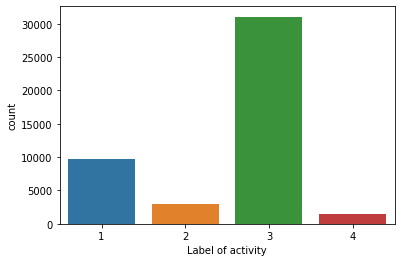

In [9]:
sb.countplot(data['Label of activity'])
plt.show()

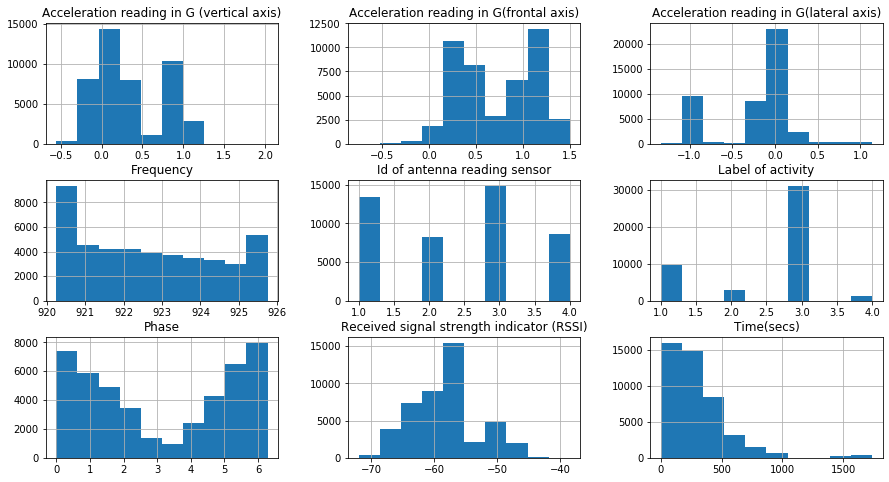

In [10]:
data.hist(figsize = (15, 8))
plt.show()

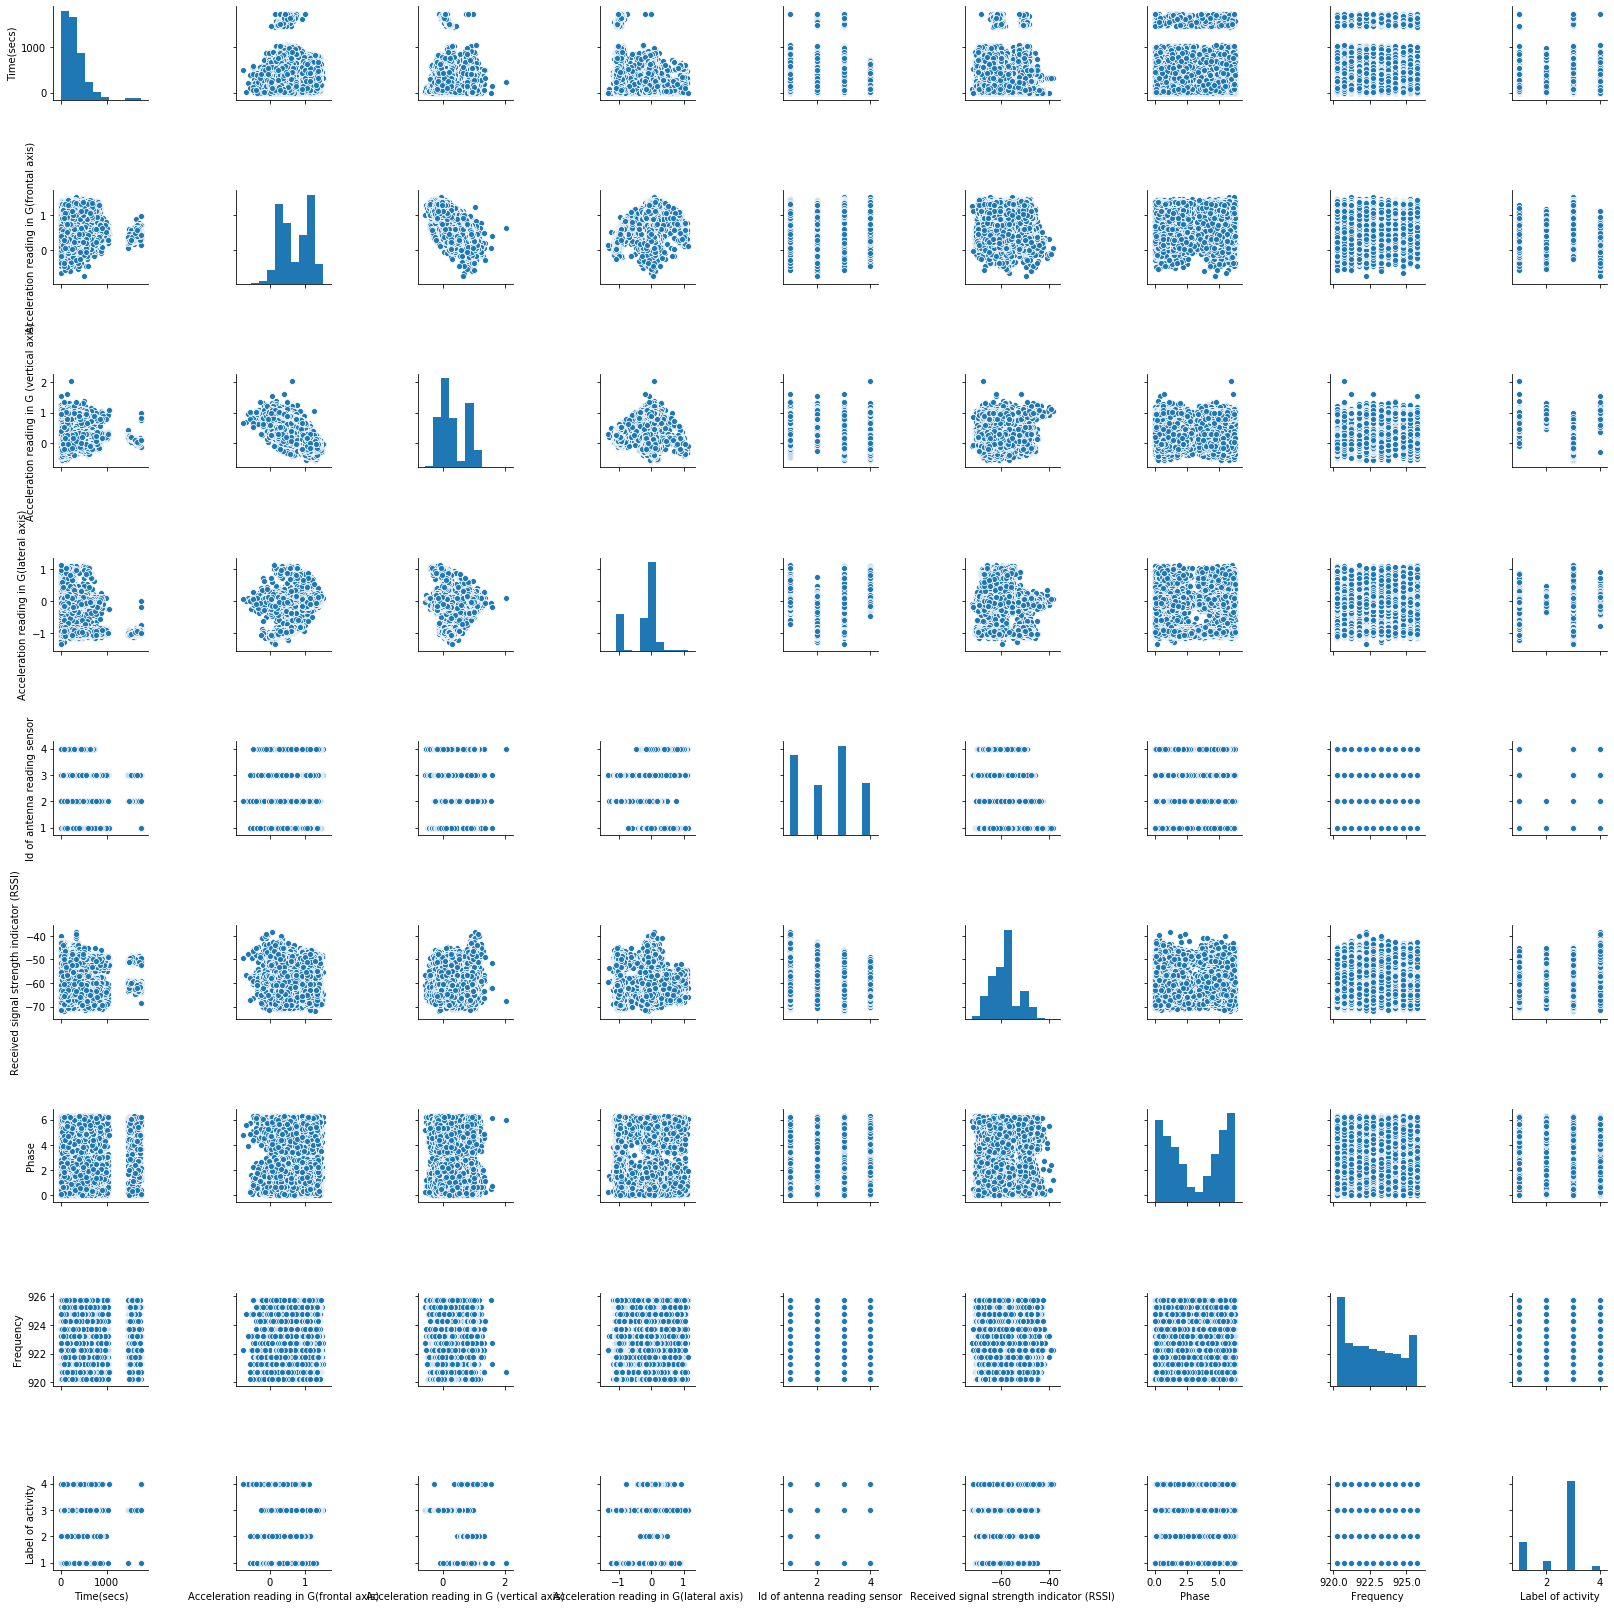

In [25]:
sb.pairplot(data)
plt.show()

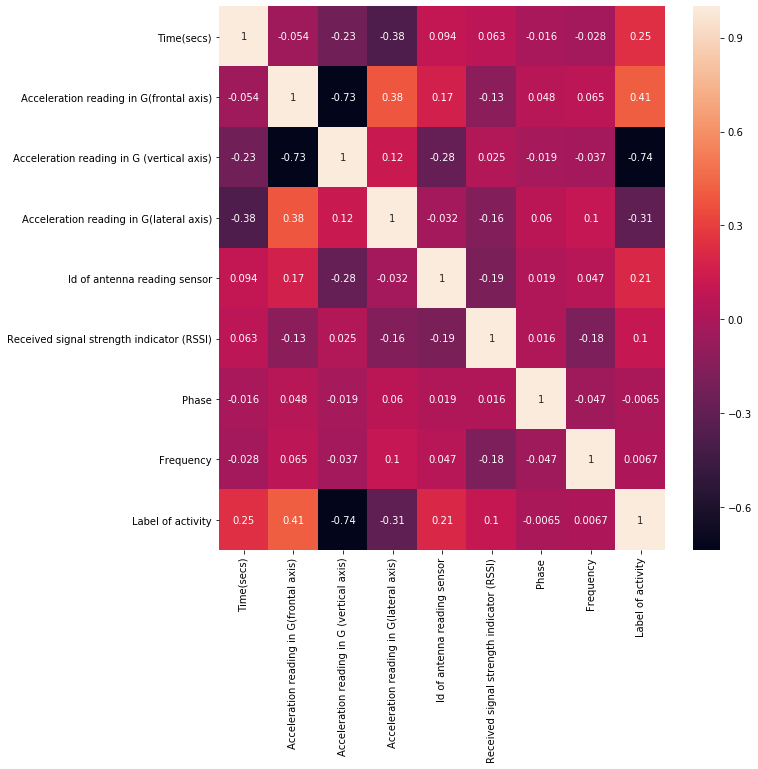

In [10]:
fig, ax = plt.subplots(figsize = (10,10))
sb.heatmap(data.corr(), annot = True)
plt.show()

# Applying KNearest Neighbours

In [11]:
x = data.iloc[:,0:-1]
y = data.iloc[:, -1:].values

In [12]:
x.head()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency
0,234.50,0.97555,-0.082679,0.134560,3,-48.5,4.2798,921.75
1,305.75,1.08110,-0.140090,-0.082102,4,-66.5,3.8948,920.75
2,444.33,0.10787,0.238850,-1.074200,3,-60.0,5.5576,923.75
3,101.75,1.13970,-0.025263,-0.093505,3,-56.5,4.0221,922.25
4,1560.30,0.26030,0.169950,-1.062800,3,-62.5,5.8644,920.25


In [13]:
ohe = OneHotEncoder(categorical_features = [4])
x = ohe.fit_transform(x).toarray()

In [14]:
x.shape

(45076, 11)

In [15]:
kn = KNeighborsClassifier()
kn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
cv_data = pd.read_csv('cross_validation.csv')

In [17]:
cv_data.head()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency,Label of activity
0,611.130,0.36583,0.319230,-0.99434,2,-49.5,2.374600,921.25,3
1,288.650,1.31560,-0.105650,-0.03649,1,-55.5,1.619900,921.25,3
2,106.250,1.03420,0.032153,-0.15052,3,-65.0,0.018408,921.75,3
3,38.825,0.23685,0.525930,-0.94873,2,-48.0,2.830200,921.25,3
4,384.000,1.05760,-0.082679,-0.03649,4,-65.5,1.138200,923.25,3


In [18]:
cv_data.shape

(15026, 9)

In [19]:
cv_x = cv_data.iloc[:, 0:-1]
cv_y = cv_data.iloc[:, -1:].values

In [20]:
cv_x.head()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency
0,611.130,0.36583,0.319230,-0.99434,2,-49.5,2.374600,921.25
1,288.650,1.31560,-0.105650,-0.03649,1,-55.5,1.619900,921.25
2,106.250,1.03420,0.032153,-0.15052,3,-65.0,0.018408,921.75
3,38.825,0.23685,0.525930,-0.94873,2,-48.0,2.830200,921.25
4,384.000,1.05760,-0.082679,-0.03649,4,-65.5,1.138200,923.25


In [21]:
cv_x = ohe.transform(cv_x).toarray()

In [22]:
cv_x.shape

(15026, 11)

In [23]:
# accuracy = cross_val_score(kn, x, y, cv = 3)
# accuracy

In [24]:
# accuracy.mean()

In [25]:
y_pred_1 = cross_val_predict(kn, cv_x, cv_y, cv = 3)

In [26]:
cr = classification_report(cv_y, y_pred_1)
print(cr)

              precision    recall  f1-score   support

           1       0.63      0.65      0.64      3317
           2       0.59      0.40      0.48      1039
           3       0.86      0.90      0.88     10231
           4       0.67      0.26      0.37       439

    accuracy                           0.79     15026
   macro avg       0.69      0.55      0.59     15026
weighted avg       0.79      0.79      0.79     15026



# Applying Standard Scalar to check  if accuracy increases

In [27]:
data.head()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency,Label of activity
0,234.50,0.97555,-0.082679,0.134560,3,-48.5,4.2798,921.75,3
1,305.75,1.08110,-0.140090,-0.082102,4,-66.5,3.8948,920.75,3
2,444.33,0.10787,0.238850,-1.074200,3,-60.0,5.5576,923.75,3
3,101.75,1.13970,-0.025263,-0.093505,3,-56.5,4.0221,922.25,3
4,1560.30,0.26030,0.169950,-1.062800,3,-62.5,5.8644,920.25,3


In [28]:
data.shape

(45076, 9)

In [29]:
data['Time(secs)'].value_counts()

0.00      52
7.25      27
44.00     22
10.75     22
8.50      21
          ..
766.08     1
103.13     1
982.75     1
394.38     1
562.58     1
Name: Time(secs), Length: 17300, dtype: int64

In [30]:
x_1 = data.iloc[:,0:-1]
y_1 = data.iloc[:,-1:].values

In [31]:
x_1.head()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency
0,234.50,0.97555,-0.082679,0.134560,3,-48.5,4.2798,921.75
1,305.75,1.08110,-0.140090,-0.082102,4,-66.5,3.8948,920.75
2,444.33,0.10787,0.238850,-1.074200,3,-60.0,5.5576,923.75
3,101.75,1.13970,-0.025263,-0.093505,3,-56.5,4.0221,922.25
4,1560.30,0.26030,0.169950,-1.062800,3,-62.5,5.8644,920.25


In [32]:
standard = StandardScaler()
x_1.iloc[:,[0,5,7]] = standard.fit_transform(x_1.iloc[:,[0,5,7]])

In [33]:
x_1.head()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency
0,-0.252501,0.97555,-0.082679,0.134560,3,1.887849,4.2798,-0.551521
1,0.023792,1.08110,-0.140090,-0.082102,4,-1.582502,3.8948,-1.146452
2,0.561178,0.10787,0.238850,-1.074200,3,-0.329320,5.5576,0.638340
3,-0.767279,1.13970,-0.025263,-0.093505,3,0.345471,4.0221,-0.254056
4,4.888687,0.26030,0.169950,-1.062800,3,-0.811313,5.8644,-1.443917


In [34]:
x_1 = ohe.transform(x_1).toarray()

In [35]:
x_1.shape

(45076, 11)

In [36]:
kn_1 = KNeighborsClassifier()
kn_1.fit(x_1, y_1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
cv_data.head()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency,Label of activity
0,611.130,0.36583,0.319230,-0.99434,2,-49.5,2.374600,921.25,3
1,288.650,1.31560,-0.105650,-0.03649,1,-55.5,1.619900,921.25,3
2,106.250,1.03420,0.032153,-0.15052,3,-65.0,0.018408,921.75,3
3,38.825,0.23685,0.525930,-0.94873,2,-48.0,2.830200,921.25,3
4,384.000,1.05760,-0.082679,-0.03649,4,-65.5,1.138200,923.25,3


In [38]:
cv_x1 = cv_data.iloc[:,0:-1]
cv_y1 = cv_data.iloc[:,-1:].values

In [39]:
cv_x1.iloc[:,[0,5,7]] = standard.transform(cv_x1.iloc[:,[0,5,7]])

In [40]:
cv_x1.head()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency
0,1.207995,0.36583,0.319230,-0.99434,2,1.695051,2.374600,-0.848987
1,-0.042518,1.31560,-0.105650,-0.03649,1,0.538268,1.619900,-0.848987
2,-0.749829,1.03420,0.032153,-0.15052,3,-1.293306,0.018408,-0.551521
3,-1.011290,0.23685,0.525930,-0.94873,2,1.984247,2.830200,-0.848987
4,0.327230,1.05760,-0.082679,-0.03649,4,-1.389705,1.138200,0.340875


In [41]:
cv_x1 = ohe.transform(cv_x1).toarray()

In [42]:
cv_x1.shape

(15026, 11)

In [43]:
y_pred_2 = cross_val_predict(kn_1, cv_x1, cv_y1, cv = 3)

In [44]:
cr1 = classification_report(cv_y1, y_pred_2)
print(cr1)

              precision    recall  f1-score   support

           1       0.92      0.93      0.92      3317
           2       0.88      0.93      0.90      1039
           3       0.98      1.00      0.99     10231
           4       0.87      0.38      0.53       439

    accuracy                           0.96     15026
   macro avg       0.91      0.81      0.84     15026
weighted avg       0.96      0.96      0.96     15026



In [45]:
cm2 = confusion_matrix(cv_y1, y_pred_2)
cm2

array([[ 3095,    69,   136,    17],
       [   66,   964,     1,     8],
       [   13,    19, 10198,     1],
       [  205,    46,    20,   168]])

In [46]:
score1 = accuracy_score(cv_y1, y_pred_2)
score1

0.9600026620524424

# Grid Search

In [47]:
data.head()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency,Label of activity
0,234.50,0.97555,-0.082679,0.134560,3,-48.5,4.2798,921.75,3
1,305.75,1.08110,-0.140090,-0.082102,4,-66.5,3.8948,920.75,3
2,444.33,0.10787,0.238850,-1.074200,3,-60.0,5.5576,923.75,3
3,101.75,1.13970,-0.025263,-0.093505,3,-56.5,4.0221,922.25,3
4,1560.30,0.26030,0.169950,-1.062800,3,-62.5,5.8644,920.25,3


In [48]:
x_2 = data.iloc[:,0:-1]
y_2 = data.iloc[:,-1:].values

In [49]:
x_2.iloc[:,[0,5,7]] = standard.transform(x_2.iloc[:,[0,5,7]])

In [50]:
x_2.head()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency
0,-0.252501,0.97555,-0.082679,0.134560,3,1.887849,4.2798,-0.551521
1,0.023792,1.08110,-0.140090,-0.082102,4,-1.582502,3.8948,-1.146452
2,0.561178,0.10787,0.238850,-1.074200,3,-0.329320,5.5576,0.638340
3,-0.767279,1.13970,-0.025263,-0.093505,3,0.345471,4.0221,-0.254056
4,4.888687,0.26030,0.169950,-1.062800,3,-0.811313,5.8644,-1.443917


In [51]:
x_2 = ohe.transform(x_2).toarray()

In [52]:
x_2.shape

(45076, 11)

In [53]:
kn_2 = KNeighborsClassifier()
kn_2.fit(x_2, y_2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [54]:
parameters = [{'n_neighbors': [3,5,7], 'metric': ['minkowski'], 'p':[2]},
             {'n_neighbors' : [3,5,7], 'metric': ['minkowski'], 'p':[1]}]

grid_search = GridSearchCV(estimator = kn_2,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 3)

grid_search = grid_search.fit(x_2, y_2)

In [55]:
accuracy = grid_search.best_score_

In [56]:
accuracy

0.9762401277841867

In [57]:
grid_search.best_params_

{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1}

In [58]:
kn_2 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1)
kn_2.fit(x_2, y_2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [59]:
cv_data.head()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency,Label of activity
0,611.130,0.36583,0.319230,-0.99434,2,-49.5,2.374600,921.25,3
1,288.650,1.31560,-0.105650,-0.03649,1,-55.5,1.619900,921.25,3
2,106.250,1.03420,0.032153,-0.15052,3,-65.0,0.018408,921.75,3
3,38.825,0.23685,0.525930,-0.94873,2,-48.0,2.830200,921.25,3
4,384.000,1.05760,-0.082679,-0.03649,4,-65.5,1.138200,923.25,3


In [60]:
cv_x2 = cv_data.iloc[:,0:-1]
cv_y2 = cv_data.iloc[:,-1:].values

In [61]:
cv_x2.iloc[:,[0,5,7]] = standard.transform(cv_x2.iloc[:,[0,5,7]])

In [62]:
cv_x2.head()

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency
0,1.207995,0.36583,0.319230,-0.99434,2,1.695051,2.374600,-0.848987
1,-0.042518,1.31560,-0.105650,-0.03649,1,0.538268,1.619900,-0.848987
2,-0.749829,1.03420,0.032153,-0.15052,3,-1.293306,0.018408,-0.551521
3,-1.011290,0.23685,0.525930,-0.94873,2,1.984247,2.830200,-0.848987
4,0.327230,1.05760,-0.082679,-0.03649,4,-1.389705,1.138200,0.340875


In [63]:
cv_x2 = ohe.transform(cv_x2).toarray()

In [64]:
cv_x2.shape

(15026, 11)

In [65]:
y_pred_3 = cross_val_predict(kn_2, cv_x2, cv_y2, cv = 3)

In [66]:
cr2 = classification_report(cv_y2, y_pred_3)
print(cr2)

              precision    recall  f1-score   support

           1       0.93      0.94      0.93      3317
           2       0.89      0.95      0.91      1039
           3       0.99      1.00      0.99     10231
           4       0.80      0.46      0.58       439

    accuracy                           0.96     15026
   macro avg       0.90      0.83      0.86     15026
weighted avg       0.96      0.96      0.96     15026



In [67]:
score2 = accuracy_score(cv_y2, y_pred_3)
score2

0.964794356448822

In [68]:
matrix = confusion_matrix(cv_y2, y_pred_3)

In [69]:
matrix = pd.DataFrame(matrix)

In [70]:
type(matrix)

pandas.core.frame.DataFrame

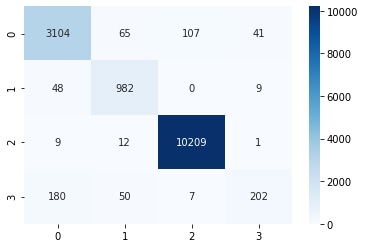

In [71]:
sb.heatmap(matrix, annot = True, cmap = 'Blues',fmt='.6g')
plt.show()

In [73]:
import pickle

objects = {'standard':standard, 'ohe':ohe, 'kn_2':kn_2}
pickle.dump(objects,open('model.pkl', 'wb'))

In [74]:
obj = pickle.load(open('model.pkl','rb'))
standard1 = obj['standard']
ohe1 = obj['ohe']
model = obj['kn_2']

In [81]:
a = data.iloc[0:1,:-1]
b = data.iloc[0:1, -1:].values

,Time(secs),Acceleration reading in G(frontal axis),Acceleration reading in G (vertical axis),Acceleration reading in G(lateral axis),Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency
0,234.5,0.97555,-0.082679,0.13456,3,-48.5,4.2798,921.75


In [82]:
a.iloc[:,[0,5,7]] = standard1.transform(a.iloc[:,[0,5,7]])

In [84]:
a = ohe.transform(a).toarray()

In [86]:
a.shape

(1, 11)

In [87]:
model.predict(a)

array([3])